# IMPORT PACKAGES & READ DATA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import pickle

In [2]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [3]:
# Show all ROWS in the output:
pd.set_option('display.max_rows', None)

# Show all COLUMNS in the output:
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv('df_cleaned_p1.csv')

In [5]:
with open("all_feature_lists_v1", "rb") as fp:
    id_features, \
    cont_features, \
    cat_features, \
    global_flavor_features, \
    f_columns_g, \
    n_columns_g, \
    t_columns_g = pickle.load(fp)


In [6]:
df.head()

,Unnamed: 0,product_title,distillery,country,region,age,abv,bottle_size,bottler,maturing,nbr_of_bottles,rating,nbr_of_ratings,index,unique_id,filtration,colouring,whisky_type,f_Spices_g,f_Sweet_g,f_Malt_g,f_Pepper_g,f_Oak_g,f_Black Currant_g,f_Fruit_g,f_Ginger_g,f_Caramel_g,f_Honey_g,f_Nuts_g,f_Oil_g,f_Zitrus_g,f_Herb_g,f_Dark Chocolate_g,f_Coffee_g,f_Grape_g,f_Chocolate_g,f_Peat Smoke_g,f_Vanilla_g,f_Orange_g,f_Sherry_g,f_Cake_g,f_Floral_g,f_Raisin_g,f_Herbs_g,f_Wheat_g,f_Chili_g,f_Salt_g,f_Tobacco_g,f_Maritime Notes_g,f_Bonfire Smoke_g,f_Alcohol_g,f_Berries_g,f_Strawberry_g,f_Apple_g,f_Blackberry_g,f_Cinnamon_g,f_Kiwi_g,f_Plum_g,f_Ham_g,f_Hazelnut_g,f_Seaweed_g,f_Lemon_g,f_Lemon Peel_g,f_Walnut_g,f_Iodine_g,f_Dried Fruit_g,f_Pear_g,f_Cherry_g,f_Date_g,f_Almonds_g,f_Heather_g,f_Leather_g,f_Banana_g,f_Clove_g,f_Medicinal Smoke_g,f_Barley_g,f_Grass_g,f_Lime_g,f_Nutmeg_g,f_Tropical Fruit_g,f_Peach_g,f_Mint_g,f_Fig_g,f_Grapefruit_g,f_Red Currant_g,f_Pineapple_g,f_Anis_g,f_Green Apple_g,f_Coconut_g,f_Hay_g,f_Rye_g,f_Melon_g,n_Sweet_g,n_Fruit_g,n_Green Apple_g,n_Pear_g,n_Zitrus_g,n_Honey_g,n_Herbs_g,n_Floral_g,n_Vanilla_g,n_Salt_g,n_Apple_g,n_Spices_g,n_Malt_g,n_Oak_g,n_Maritime Notes_g,n_Sherry_g,n_Caramel_g,n_Dried Fruit_g,n_Leather_g,n_Lemon_g,n_Orange_g,n_Herb_g,n_Cherry_g,n_Fig_g,n_Raisin_g,n_Seaweed_g,n_Cinnamon_g,n_Plum_g,n_Peat Smoke_g,n_Bonfire Smoke_g,n_Tobacco_g,n_Barley_g,n_Wheat_g,n_Chocolate_g,n_Chili_g,n_Coffee_g,n_Grass_g,n_Berries_g,n_Oil_g,n_Nuts_g,n_Heather_g,n_Ham_g,n_Iodine_g,n_Pineapple_g,n_Strawberry_g,n_Grape_g,n_Red Currant_g,n_Nutmeg_g,n_Peach_g,n_Alcohol_g,n_Lime_g,n_Walnut_g,n_Blackberry_g,n_Ginger_g,n_Dark Chocolate_g,n_Date_g,n_Cake_g,n_Clove_g,n_Pepper_g,n_Tropical Fruit_g,n_Banana_g,n_Coconut_g,n_Hazelnut_g,n_Lemon Peel_g,n_Melon_g,n_Black Currant_g,n_Almonds_g,n_Mint_g,n_Anis_g,n_Hay_g,n_Medicinal Smoke_g,n_Grapefruit_g,n_Rye_g,n_Kiwi_g,t_Fruit_g,t_Sweet_g,t_Pear_g,t_Vanilla_g,t_Green Apple_g,t_Caramel_g,t_Spices_g,t_Pepper_g,t_Malt_g,t_Oak_g,t_Zitrus_g,t_Honey_g,t_Lemon_g,t_Herb_g,t_Coffee_g,t_Orange_g,t_Chocolate_g,t_Sherry_g,t_Alcohol_g,t_Dried Fruit_g,t_Grape_g,t_Peat Smoke_g,t_Raisin_g,t_Nuts_g,t_Oil_g,t_Salt_g,t_Maritime Notes_g,t_Peach_g,t_Bonfire Smoke_g,t_Plum_g,t_Chili_g,t_Nutmeg_g,t_Cherry_g,t_Dark Chocolate_g,t_Leather_g,t_Almonds_g,t_Berries_g,t_Barley_g,t_Herbs_g,t_Tobacco_g,t_Heather_g,t_Ham_g,t_Walnut_g,t_Grass_g,t_Floral_g,t_Black Currant_g,t_Blackberry_g,t_Tropical Fruit_g,t_Date_g,t_Cake_g,t_Cinnamon_g,t_Apple_g,t_Seaweed_g,t_Grapefruit_g,t_Medicinal Smoke_g,t_Lemon Peel_g,t_Ginger_g,t_Fig_g,t_Hazelnut_g,t_Banana_g,t_Clove_g,t_Melon_g,t_Mint_g,t_Red Currant_g,t_Hay_g,t_Lime_g,t_Wheat_g,t_Iodine_g,t_Pineapple_g,t_Rye_g,t_Anis_g,t_Strawberry_g,t_Coconut_g,t_Kiwi_g
0,0,Talisker 10 Years,Talisker,Scotland,Islands,10.0,45.8,0.7,Original bottling,NaN,327.0,NaN,0,0,0_Talisker 10 Years,NaN,NaN,Single Malt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Glen Moray Elgin Classic,Glen Moray,Scotland,Speyside,NaN,40.0,0.7,Original bottling,NaN,228.0,3.4,24,1,1_Glen Moray Elgin Classic,Filtration,Colouring,Single Malt,0.5059,2.3293,2.0943,1.7707,0.2346,0.5536,0.2529

In [7]:
df.drop(['Unnamed: 0','index'],axis=1,inplace=True)

In [8]:
len(df)

22986

In [9]:
df = df.reset_index(drop=True)

In [10]:
df.head()

,product_title,distillery,country,region,age,abv,bottle_size,bottler,maturing,nbr_of_bottles,rating,nbr_of_ratings,unique_id,filtration,colouring,whisky_type,f_Spices_g,f_Sweet_g,f_Malt_g,f_Pepper_g,f_Oak_g,f_Black Currant_g,f_Fruit_g,f_Ginger_g,f_Caramel_g,f_Honey_g,f_Nuts_g,f_Oil_g,f_Zitrus_g,f_Herb_g,f_Dark Chocolate_g,f_Coffee_g,f_Grape_g,f_Chocolate_g,f_Peat Smoke_g,f_Vanilla_g,f_Orange_g,f_Sherry_g,f_Cake_g,f_Floral_g,f_Raisin_g,f_Herbs_g,f_Wheat_g,f_Chili_g,f_Salt_g,f_Tobacco_g,f_Maritime Notes_g,f_Bonfire Smoke_g,f_Alcohol_g,f_Berries_g,f_Strawberry_g,f_Apple_g,f_Blackberry_g,f_Cinnamon_g,f_Kiwi_g,f_Plum_g,f_Ham_g,f_Hazelnut_g,f_Seaweed_g,f_Lemon_g,f_Lemon Peel_g,f_Walnut_g,f_Iodine_g,f_Dried Fruit_g,f_Pear_g,f_Cherry_g,f_Date_g,f_Almonds_g,f_Heather_g,f_Leather_g,f_Banana_g,f_Clove_g,f_Medicinal Smoke_g,f_Barley_g,f_Grass_g,f_Lime_g,f_Nutmeg_g,f_Tropical Fruit_g,f_Peach_g,f_Mint_g,f_Fig_g,f_Grapefruit_g,f_Red Currant_g,f_Pineapple_g,f_Anis_g,f_Green Apple_g,f_Coconut_g,f_Hay_g,f_Rye_g,f_Melon_g,n_Sweet_g,n_Fruit_g,n_Green Apple_g,n_Pear_g,n_Zitrus_g,n_Honey_g,n_Herbs_g,n_Floral_g,n_Vanilla_g,n_Salt_g,n_Apple_g,n_Spices_g,n_Malt_g,n_Oak_g,n_Maritime Notes_g,n_Sherry_g,n_Caramel_g,n_Dried Fruit_g,n_Leather_g,n_Lemon_g,n_Orange_g,n_Herb_g,n_Cherry_g,n_Fig_g,n_Raisin_g,n_Seaweed_g,n_Cinnamon_g,n_Plum_g,n_Peat Smoke_g,n_Bonfire Smoke_g,n_Tobacco_g,n_Barley_g,n_Wheat_g,n_Chocolate_g,n_Chili_g,n_Coffee_g,n_Grass_g,n_Berries_g,n_Oil_g,n_Nuts_g,n_Heather_g,n_Ham_g,n_Iodine_g,n_Pineapple_g,n_Strawberry_g,n_Grape_g,n_Red Currant_g,n_Nutmeg_g,n_Peach_g,n_Alcohol_g,n_Lime_g,n_Walnut_g,n_Blackberry_g,n_Ginger_g,n_Dark Chocolate_g,n_Date_g,n_Cake_g,n_Clove_g,n_Pepper_g,n_Tropical Fruit_g,n_Banana_g,n_Coconut_g,n_Hazelnut_g,n_Lemon Peel_g,n_Melon_g,n_Black Currant_g,n_Almonds_g,n_Mint_g,n_Anis_g,n_Hay_g,n_Medicinal Smoke_g,n_Grapefruit_g,n_Rye_g,n_Kiwi_g,t_Fruit_g,t_Sweet_g,t_Pear_g,t_Vanilla_g,t_Green Apple_g,t_Caramel_g,t_Spices_g,t_Pepper_g,t_Malt_g,t_Oak_g,t_Zitrus_g,t_Honey_g,t_Lemon_g,t_Herb_g,t_Coffee_g,t_Orange_g,t_Chocolate_g,t_Sherry_g,t_Alcohol_g,t_Dried Fruit_g,t_Grape_g,t_Peat Smoke_g,t_Raisin_g,t_Nuts_g,t_Oil_g,t_Salt_g,t_Maritime Notes_g,t_Peach_g,t_Bonfire Smoke_g,t_Plum_g,t_Chili_g,t_Nutmeg_g,t_Cherry_g,t_Dark Chocolate_g,t_Leather_g,t_Almonds_g,t_Berries_g,t_Barley_g,t_Herbs_g,t_Tobacco_g,t_Heather_g,t_Ham_g,t_Walnut_g,t_Grass_g,t_Floral_g,t_Black Currant_g,t_Blackberry_g,t_Tropical Fruit_g,t_Date_g,t_Cake_g,t_Cinnamon_g,t_Apple_g,t_Seaweed_g,t_Grapefruit_g,t_Medicinal Smoke_g,t_Lemon Peel_g,t_Ginger_g,t_Fig_g,t_Hazelnut_g,t_Banana_g,t_Clove_g,t_Melon_g,t_Mint_g,t_Red Currant_g,t_Hay_g,t_Lime_g,t_Wheat_g,t_Iodine_g,t_Pineapple_g,t_Rye_g,t_Anis_g,t_Strawberry_g,t_Coconut_g,t_Kiwi_g
0,Talisker 10 Years,Talisker,Scotland,Islands,10.0,45.8,0.7,Original bottling,NaN,327.0,NaN,0,0_Talisker 10 Years,NaN,NaN,Single Malt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Glen Moray Elgin Classic,Glen Moray,Scotland,Speyside,NaN,40.0,0.7,Original bottling,NaN,228.0,3.4,24,1_Glen Moray Elgin Classic,Filtration,Colouring,Single Malt,0.5059,2.3293,2.0943,1.7707,0.2346,0.5536,0.2529,0.2647,0.2618,0.2677,0.2

In [11]:
# Remove 'Number of bottles'
df = df.drop('nbr_of_bottles', axis=1)

In [12]:
cont_features.remove('nbr_of_bottles')

In [13]:
cont_features

['age', 'rating', 'abv', 'nbr_of_ratings', 'bottle_size']

# MISSING VALUES

In [14]:
# Function that checks for missing data and identifies features that don't have missing data:
def check_for_missing_values(df):
    
    #If there are no empty values in any of the columns:
    if np.sum(df.isnull().sum()) == 0:
        return "This df has no empty values."
    
    #If there are empty values in at least one column:
    else:
        #create dataframe with the % of missing values per feature
        perc_isnulls = pd.DataFrame(round(df.isnull().sum() / len(df) * 100, 2))
        perc_isnulls = perc_isnulls.reset_index()
        perc_isnulls.columns = ['Feature','% Missing']
        perc_isnulls['Count'] = round(perc_isnulls['% Missing']*len(df)/100,0)
        perc_isnulls = perc_isnulls.reset_index().drop('index',axis=1)

        #create dataframe with features that have missing values:
        isnulls_df = perc_isnulls[perc_isnulls['% Missing']>0].sort_values(by='% Missing',ascending=False)

        #create list of features that have missing values:
        isnulls = list(perc_isnulls[perc_isnulls['% Missing']>0]['Feature'])

        #create list of features that have no missing values:
        nonulls = list(perc_isnulls[perc_isnulls['% Missing']==0]['Feature'])

        #create visualization of the features with missing values:
        plt.figure(figsize=(12,5), dpi=200)
        sns.barplot(x=isnulls_df['Feature'], y=isnulls_df['% Missing'])
        plt.axhline(y=50, color='red', linewidth=2)
        plt.title('Percentage of missing values per column')
        plt.xticks(rotation=90)
        
        #rows with how many missing values
        missing_values_per_row = df.isnull().sum(axis=1).value_counts()

        #return the df and lists:
        return "Features with missing values:", isnulls_df, "Features with NO missing values:", nonulls, "Rows with x missing values:",missing_values_per_row

In [15]:
# Function to create a 'missing value' feature
# (1 = is a missing value, 0 = is NOT a missing value)
def create_missing_value_feature(col):
    if pd.isna(col):
        return 1
    else:
        return 0

In [16]:
# Function to remove rows with empty values for x (threshold) features
def remove_rows_with_empty_values(df, df_to_filter, threshold):
    # Count the number of NaN values in each row
    na_counts = df_to_filter.isna().sum(axis=1)
    
    # Filter rows with less than or equal to threshold NaN values
    filtered_df = df[na_counts < threshold]
    
    return filtered_df

### Initial triage

In [17]:
df[['rating']+n_columns_g+t_columns_g+f_columns_g].isna().all(axis=1).sum()

9122

In [18]:
df = df.dropna(axis=0,subset=['rating']+n_columns_g+t_columns_g+f_columns_g,how='all')

In [19]:
len(df)

13864

### Categorical features

('Features with missing values:',
       Feature  % Missing   Count
 5   colouring      52.29  7249.0
 6    maturing      34.10  4728.0
 1      region      32.83  4552.0
 4  filtration      24.90  3452.0
 0     country      11.22  1556.0
 2  distillery       2.29   317.0
 3     bottler       1.33   184.0,
 'Features with NO missing values:',
 ['whisky_type'],
 'Rows with x missing values:',
 1    4265
 0    3255
 2    3157
 3    1793
 4     943
 5     404
 6      41
 7       6
 Name: count, dtype: int64)

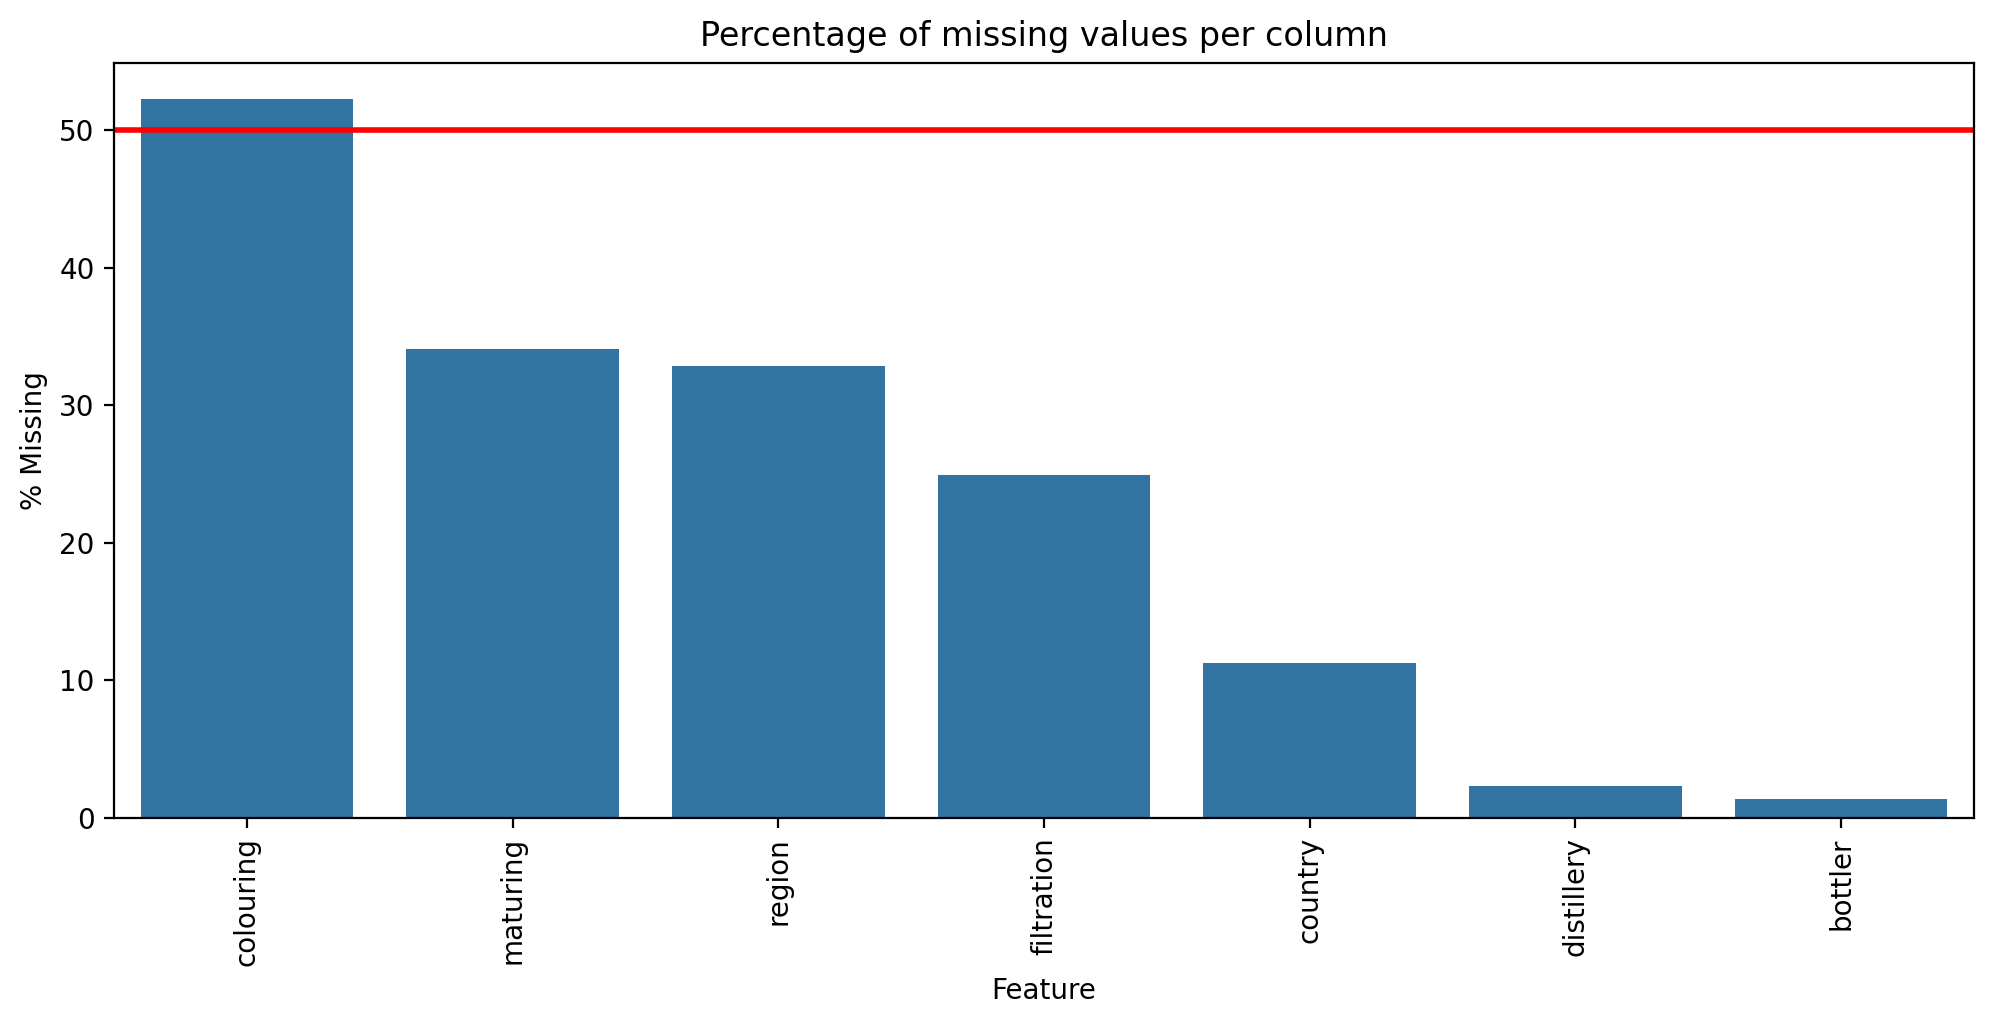

In [20]:
check_for_missing_values(df[cat_features])

In [21]:
# Create 'missing value' features
df['missing_colouring'] = df['colouring'].apply(create_missing_value_feature)
df['missing_filtration'] = df['filtration'].apply(create_missing_value_feature)
df['missing_country'] = df['country'].apply(create_missing_value_feature)
df['missing_region'] = df['region'].apply(create_missing_value_feature)
df['missing_distillery'] = df['distillery'].apply(create_missing_value_feature)
df['missing_bottler'] = df['bottler'].apply(create_missing_value_feature)
df['missing_maturing'] = df['maturing'].apply(create_missing_value_feature)

In [22]:
# Remove rows with empty values above a certain threshold
df = remove_rows_with_empty_values(df, df[cat_features], 5)

('Features with missing values:',
       Feature  % Missing   Count
 5   colouring      50.72  6803.0
 6    maturing      32.06  4300.0
 1      region      30.57  4100.0
 4  filtration      22.94  3077.0
 0     country       8.33  1117.0
 2  distillery       1.32   177.0
 3     bottler       1.16   156.0,
 'Features with NO missing values:',
 ['whisky_type'],
 'Rows with x missing values:',
 1    4265
 0    3255
 2    3157
 3    1793
 4     943
 Name: count, dtype: int64)

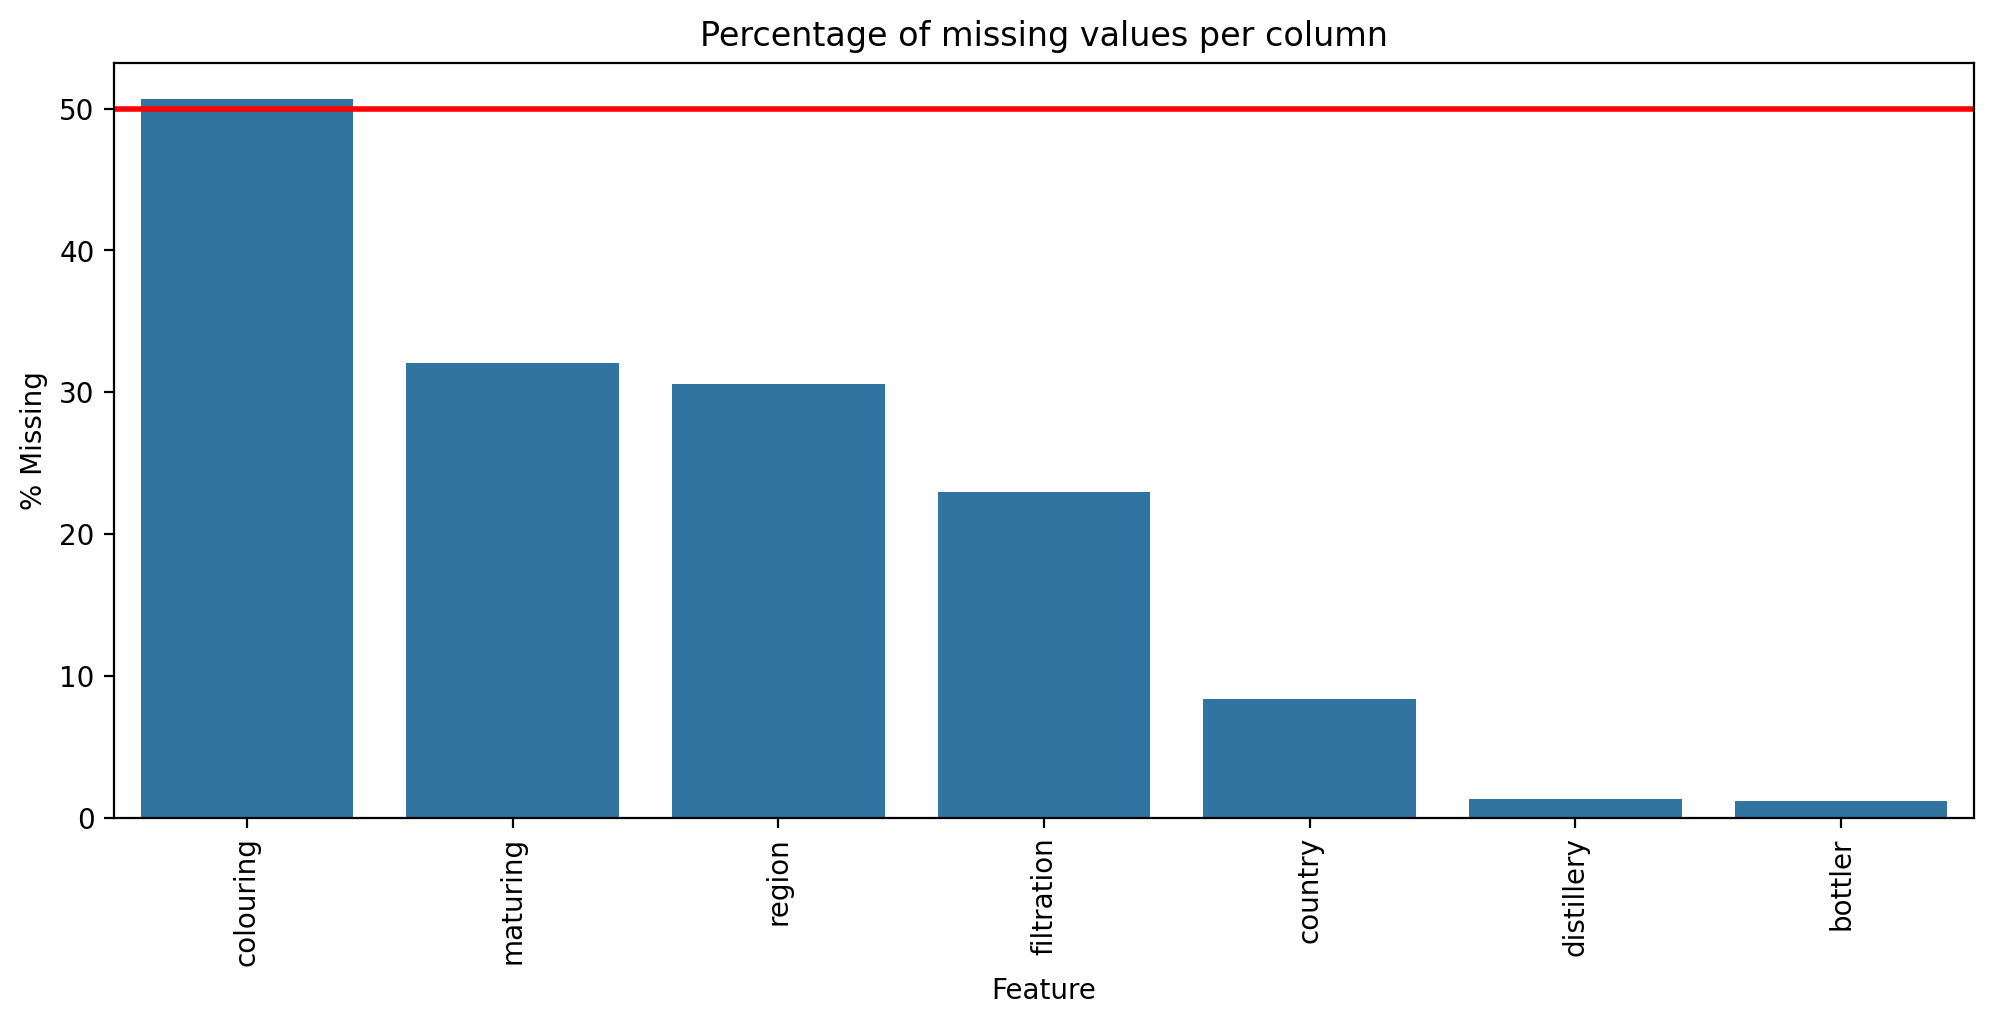

In [23]:
# Check again for missing values
check_for_missing_values(df[cat_features])

In [24]:
# Check for number of categories
print(f"Number of categories:")
for i in cat_features:
    print(f"{i} = {df[i].nunique()}")

Number of categories:
country = 47
region = 26
distillery = 472
bottler = 77
filtration = 2
colouring = 2
maturing = 18
whisky_type = 7


In [25]:
len(df)

13413

### Flavors Strength Ratings

In [26]:
df[n_columns_g+t_columns_g+f_columns_g].isna().all(axis=1).sum()

6756

In [27]:
df = df.dropna(axis=0,subset=n_columns_g+t_columns_g+f_columns_g,how='all')

In [28]:
len(df)

6657

In [29]:
df[n_columns_g+t_columns_g+f_columns_g] = df[n_columns_g+t_columns_g+f_columns_g].fillna(0)

In [30]:
check_for_missing_values(df[n_columns_g+t_columns_g+f_columns_g])

'This df has no empty values.'

### Other numerical features

('Features with missing values:',
   Feature  % Missing   Count
 0     age      46.73  3111.0
 1  rating      24.80  1651.0,
 'Features with NO missing values:',
 ['abv', 'nbr_of_ratings', 'bottle_size'],
 'Rows with x missing values:',
 1    3486
 0    2533
 2     638
 Name: count, dtype: int64)

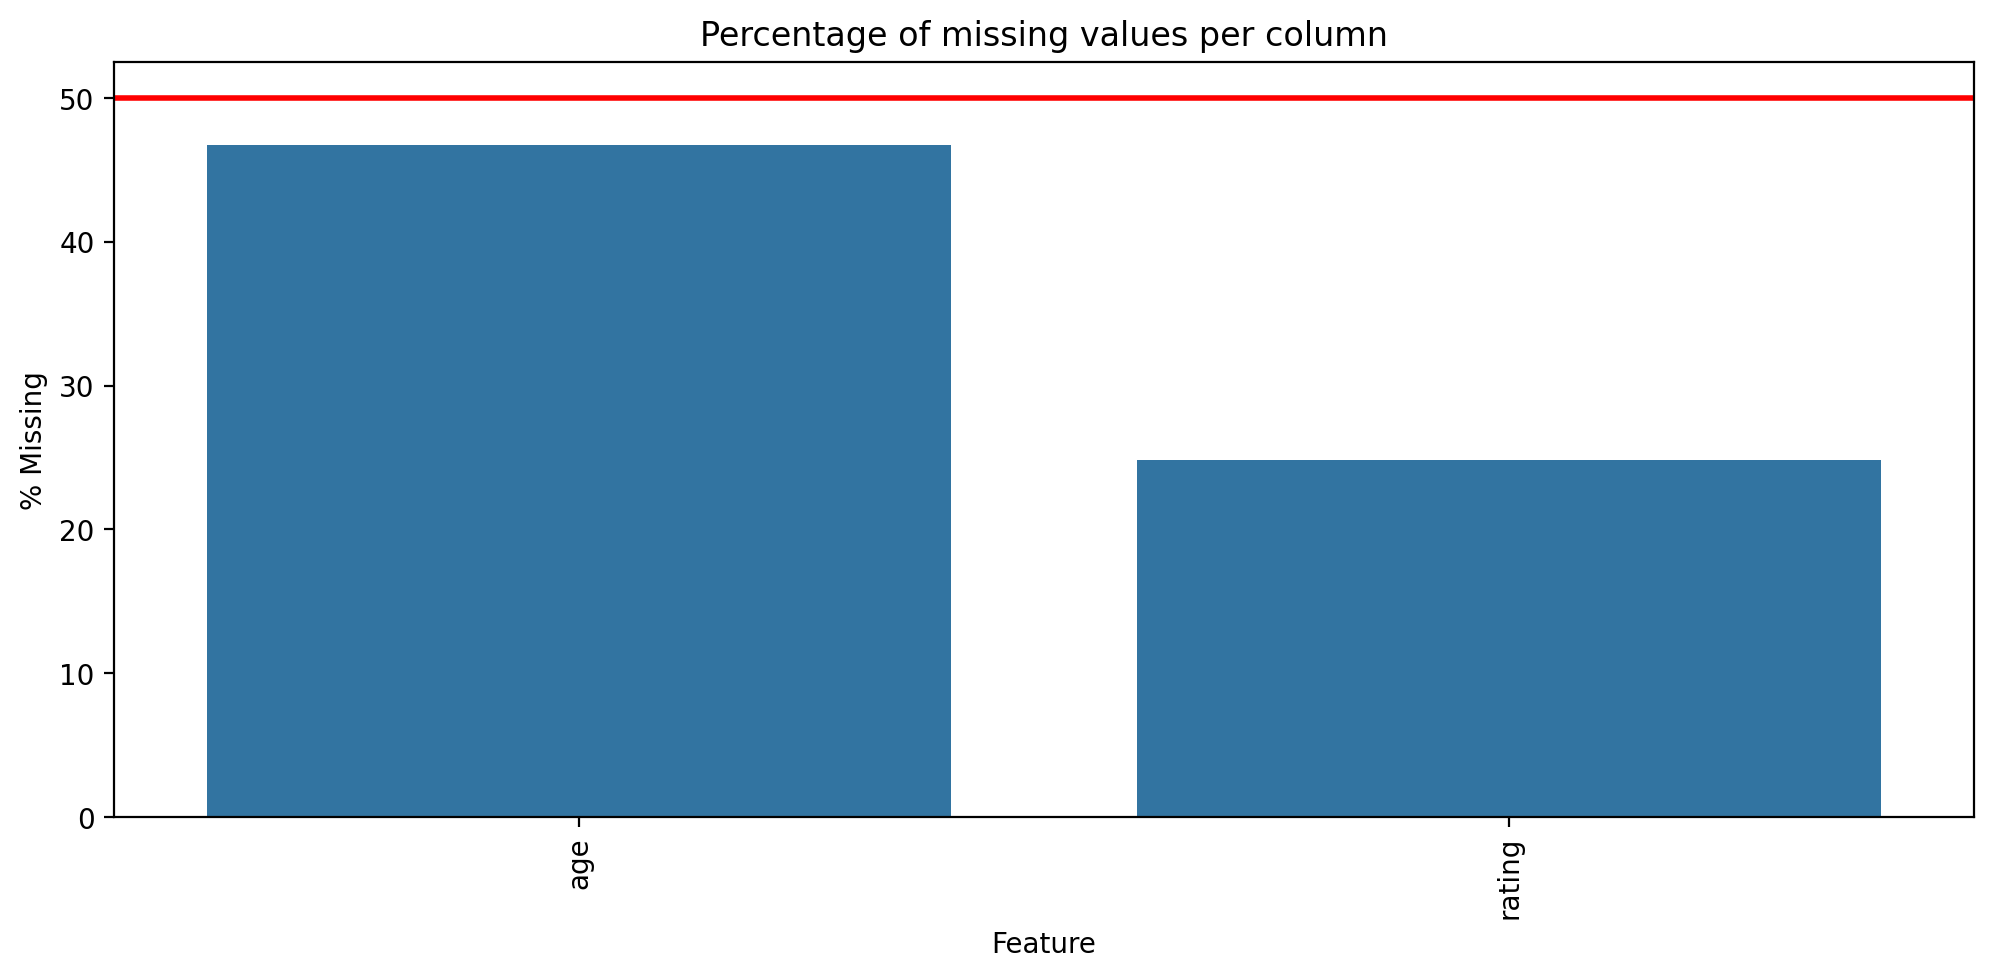

In [31]:
check_for_missing_values(df[cont_features])

In [32]:
# Create 'missing value' features
df['missing_age'] = df['age'].apply(create_missing_value_feature)
df['missing_rating'] = df['rating'].apply(create_missing_value_feature)

In [33]:
len(df)

6657

# OUTLIERS

### Age

<AxesSubplot: >

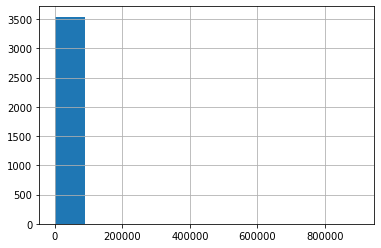

In [34]:
df['age'].hist()

<AxesSubplot: ylabel='age'>

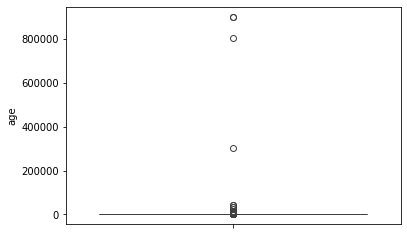

In [35]:
sns.boxplot(df['age'])

In [36]:
len(df[df['age']>200])

75

In [37]:
df[df['age']>200]

,product_title,distillery,country,region,age,abv,bottle_size,bottler,maturing,rating,nbr_of_ratings,unique_id,filtration,colouring,whisky_type,f_Spices_g,f_Sweet_g,f_Malt_g,f_Pepper_g,f_Oak_g,f_Black Currant_g,f_Fruit_g,f_Ginger_g,f_Caramel_g,f_Honey_g,f_Nuts_g,f_Oil_g,f_Zitrus_g,f_Herb_g,f_Dark Chocolate_g,f_Coffee_g,f_Grape_g,f_Chocolate_g,f_Peat Smoke_g,f_Vanilla_g,f_Orange_g,f_Sherry_g,f_Cake_g,f_Floral_g,f_Raisin_g,f_Herbs_g,f_Wheat_g,f_Chili_g,f_Salt_g,f_Tobacco_g,f_Maritime Notes_g,f_Bonfire Smoke_g,f_Alcohol_g,f_Berries_g,f_Strawberry_g,f_Apple_g,f_Blackberry_g,f_Cinnamon_g,f_Kiwi_g,f_Plum_g,f_Ham_g,f_Hazelnut_g,f_Seaweed_g,f_Lemon_g,f_Lemon Peel_g,f_Walnut_g,f_Iodine_g,f_Dried Fruit_g,f_Pear_g,f_Cherry_g,f_Date_g,f_Almonds_g,f_Heather_g,f_Leather_g,f_Banana_g,f_Clove_g,f_Medicinal Smoke_g,f_Barley_g,f_Grass_g,f_Lime_g,f_Nutmeg_g,f_Tropical Fruit_g,f_Peach_g,f_Mint_g,f_Fig_g,f_Grapefruit_g,f_Red Currant_g,f_Pineapple_g,f_Anis_g,f_Green Apple_g,f_Coconut_g,f_Hay_g,f_Rye_g,f_Melon_g,n_Sweet_g,n_Fruit_g,n_Green Apple_g,n_Pear_g,n_Zitrus_g,n_Honey_g,n_Herbs_g,n_Floral_g,n_Vanilla_g,n_Salt_g,n_Apple_g,n_Spices_g,n_Malt_g,n_Oak_g,n_Maritime Notes_g,n_Sherry_g,n_Caramel_g,n_Dried Fruit_g,n_Leather_g,n_Lemon_g,n_Orange_g,n_Herb_g,n_Cherry_g,n_Fig_g,n_Raisin_g,n_Seaweed_g,n_Cinnamon_g,n_Plum_g,n_Peat Smoke_g,n_Bonfire Smoke_g,n_Tobacco_g,n_Barley_g,n_Wheat_g,n_Chocolate_g,n_Chili_g,n_Coffee_g,n_Grass_g,n_Berries_g,n_Oil_g,n_Nuts_g,n_Heather_g,n_Ham_g,n_Iodine_g,n_Pineapple_g,n_Strawberry_g,n_Grape_g,n_Red Currant_g,n_Nutmeg_g,n_Peach_g,n_Alcohol_g,n_Lime_g,n_Walnut_g,n_Blackberry_g,n_Ginger_g,n_Dark Chocolate_g,n_Date_g,n_Cake_g,n_Clove_g,n_Pepper_g,n_Tropical Fruit_g,n_Banana_g,n_Coconut_g,n_Hazelnut_g,n_Lemon Peel_g,n_Melon_g,n_Black Currant_g,n_Almonds_g,n_Mint_g,n_Anis_g,n_Hay_g,n_Medicinal Smoke_g,n_Grapefruit_g,n_Rye_g,n_Kiwi_g,t_Fruit_g,t_Sweet_g,t_Pear_g,t_Vanilla_g,t_Green Apple_g,t_Caramel_g,t_Spices_g,t_Pepper_g,t_Malt_g,t_Oak_g,t_Zitrus_g,t_Honey_g,t_Lemon_g,t_Herb_g,t_Coffee_g,t_Orange_g,t_Chocolate_g,t_Sherry_g,t_Alcohol_g,t_Dried Fruit_g,t_Grape_g,t_Peat Smoke_g,t_Raisin_g,t_Nuts_g,t_Oil_g,t_Salt_g,t_Maritime Notes_g,t_Peach_g,t_Bonfire Smoke_g,t_Plum_g,t_Chili_g,t_Nutmeg_g,t_Cherry_g,t_Dark Chocolate_g,t_Leather_g,t_Almonds_g,t_Berries_g,t_Barley_g,t_Herbs_g,t_Tobacco_g,t_Heather_g,t_Ham_g,t_Walnut_g,t_Grass_g,t_Floral_g,t_Black Currant_g,t_Blackberry_g,t_Tropical Fruit_g,t_Date_g,t_Cake_g,t_Cinnamon_g,t_Apple_g,t_Seaweed_g,t_Grapefruit_g,t_Medicinal Smoke_g,t_Lemon Peel_g,t_Ginger_g,t_Fig_g,t_Hazelnut_g,t_Banana_g,t_Clove_g,t_Melon_g,t_Mint_g,t_Red Currant_g,t_Hay_g,t_Lime_g,t_Wheat_g,t_Iodine_g,t_Pineapple_g,t_Rye_g,t_Anis_g,t_Strawberry_g,t_Coconut_g,t_Kiwi_g,missing_colouring,missing_filtration,missing_country,missing_region,missing_distillery,missing_bottler,missing_maturing,missing_age,missing_rating
206,Glenburgie - 1995,Glenburgie,Scotland,Speyside,6345.0,58.1,0.7,Gordon & MacPhail,Sherry,5.0,1,206_Glenburgie - 1995,No filtration,No colouring,Single Malt,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0000,0.0000,0.0,0.0000,0.0000,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0332,1.5208,0.0000,0.0000,0.0000,0.0000,2.0576,2.5874,3.7799,0.0,0.0000,0.0000,0.0000,0.0000,0.0,1.7230,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0,2.5001,0.0,0.0000,0.0,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0,0.0000,0.0,0.0,2.6169,0.0,0.0000,0.0,0.0,0.0000,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0000,0.0,0.0000,0.0,0.0000,0.0,0.0,1.4442,2.0274,0.0000,0.0000,0.0,0.0000,2.3271,0.0000,0.0000,0.0000,2.6465,0.0000,2.6169,2.5874,0.0000,0.0000,2.5001,1.4224,0.0000,0.0000,0.0000,0

In [38]:
len(df[df['age']>50])

86

<AxesSubplot: xlabel='age', ylabel='Count'>

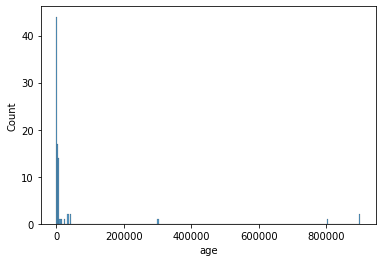

In [39]:
sns.histplot(df[df['age']>50]['age'])

In [40]:
df.loc[df['age'] > 50, 'age'] = np.nan

<AxesSubplot: xlabel='age', ylabel='Count'>

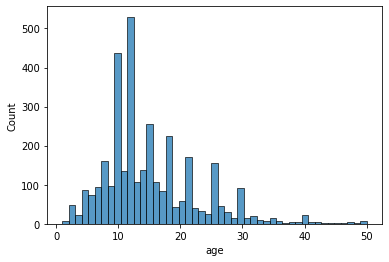

In [41]:
sns.histplot(df['age'])

### ABV

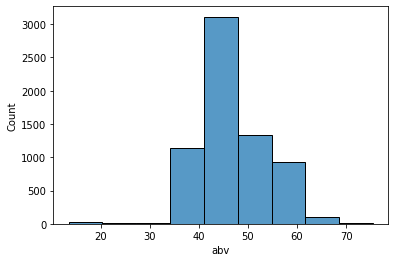

In [42]:
with pd.option_context('mode.use_inf_as_na', True):
    sns.histplot(df['abv'], bins=9)

In [43]:
df[['product_title','abv']][df['abv']<40]

,product_title,abv
167,Southern Comfort Whiskey Likör,35.0
601,Bud Spencer Banana Joe by St. Kilian Sahnelikör,21.0
647,Jack Daniel‘s Tennessee Apple,35.0
935,Sömmerlik Rhubarb - Rhabarber mit Hauch Vanille,38.8
1141,Sortilège,30.0
1396,Jack Daniel‘s Tennessee Apple - Metallbox,35.0
1520,Hayman&#039;s Clementine Snow Globe Gin Liqueur,20.0
1592,Tullamore D.E.W. Honey,35.0
2079,Monkey 47 Sloe Gin,29.0
2189,St. Kilian Cream Sahnelikör,25.0


In [44]:
# Remove liquors
df = df[df['abv']>=40].reset_index(drop=True)

In [45]:
len(df)

6559

### Bottle Size

<AxesSubplot: xlabel='bottle_size', ylabel='Count'>

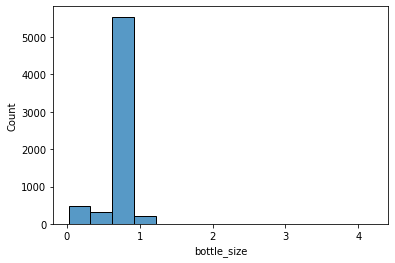

In [46]:
sns.histplot(df['bottle_size'])

### Number of Ratings

<AxesSubplot: xlabel='nbr_of_ratings', ylabel='Count'>

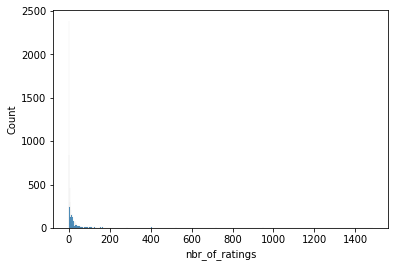

In [47]:
sns.histplot(df['nbr_of_ratings'])

### Rating

<AxesSubplot: xlabel='rating', ylabel='Count'>

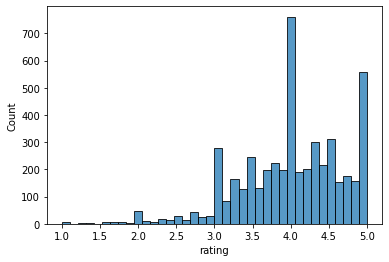

In [48]:
sns.histplot(df['rating'])

# DATA TRANSFORMATION

In [49]:
# Function to retain only the top 10 most frequent categories and makes the other values 'Other'
# (also, it keeps NaN as NaN)
def top_10_categories(col):
    category_freqs = col.value_counts()
    top_categories = category_freqs.nlargest(10).index.tolist()
        
    return col.apply(lambda x: x if pd.isnull(x) or x in top_categories else 'Other')
    

In [50]:
# Function to test for skewness
def check_for_skewness(col):
    skew = pd.DataFrame(col.skew().sort_values(ascending=False), columns = ['skewness'])
    
    def skewness_level(x):
        if x > -0.5 and x <0.5:
            return '1. Fairly symmetrical'
        elif (x > -1 and x <=-0.5) or (x >= 0.5 and x <1):
            return '2. Moderately skewed'
        else:
            return '3. Highly skewed'

    def skewness_sign(x):
        if x < 0:
            return 'Left'
        else:
            return 'Right' 

    skew['level'] = skew['skewness'].apply(lambda x: skewness_level(x))
    skew['direction'] = skew['skewness'].apply(lambda x: skewness_sign(x))

    return skew
    

### Categorical Features

#### Country

In [51]:
df['country'].value_counts()

country
Scotland               4402
USA                     355
Ireland                 350
Germany                 223
Japan                   117
Sweden                   63
Taiwan                   62
Switzerland              51
Canada                   45
England                  43
France                   41
India                    29
Wales                    28
Australia                25
Denmark                  21
Martinique               17
Iceland                  16
New Zealand              16
Barbados                 14
Netherlands              12
Italy                    12
Israel                   12
Finland                  10
Venezuela                10
Austria                   9
Spain                     7
Czech Republic            6
Jamaica                   5
Trinidad and Tobago       4
St. Lucia                 4
Guatemala                 4
Guyana                    4
El Salvador               4
Antigua                   3
Colombia                  3
Grenada     

In [52]:
df['country_CAT'] = top_10_categories(df['country'])

In [53]:
df[['country','country_CAT']].head(30)

,country,country_CAT
0,Scotland,Scotland
1,Scotland,Scotland
2,NaN,NaN
3,Canada,Canada
4,Czech Republic,Other
5,Germany,Germany
6,Scotland,Scotland
7,Scotland,Scotland
8,USA,USA
9,NaN,NaN


In [54]:
df['country_CAT'].value_counts()

country_CAT
Scotland       4402
USA             355
Ireland         350
Other           335
Germany         223
Japan           117
Sweden           63
Taiwan           62
Switzerland      51
Canada           45
England          43
Name: count, dtype: int64

In [55]:
# df.groupby('country')['rating'].agg('mean').sort_values(ascending=False)

#### Region

In [56]:
df['region'].value_counts()

region
Speyside         1647
Highlands        1017
Islay             625
Islands           380
Lowlands          245
Kentucky          234
Campbeltown       176
Caribbean          46
Tennessee          44
Illinois           16
Texas              14
Virginia            6
Indiana             4
Washington          3
Oregon              3
New York            3
Michigan            2
West Virginia       2
California          2
Iowa                2
Maryland            2
Vermont             2
Corsica             1
Name: count, dtype: int64

In [57]:
df['region_CAT'] = top_10_categories(df['region'])

In [58]:
df['region_CAT'].value_counts()

region_CAT
Speyside       1647
Highlands      1017
Islay           625
Islands         380
Lowlands        245
Kentucky        234
Campbeltown     176
Other            46
Caribbean        46
Tennessee        44
Illinois         16
Name: count, dtype: int64

In [59]:
# df['region'] = df['region'].fillna(df['country'])

#### Bottler

In [60]:
df['bottler'].value_counts()

bottler
Original bottling                              4672
Gordon & MacPhail                               387
Other bottler                                   352
Douglas Laing                                   242
Signatory Vintage                               131
Meadowside Blending                             116
Murray McDavid                                  104
Wemyss Malts                                     82
Duncan Taylor                                    74
A.D. Rattray                                     70
Ian MacLeod                                      51
Hunter Laing                                     47
C&S                                              34
Diageo                                           17
Spirit & Cask                                    17
Compass Box                                      15
Fable                                            15
Morrison & MacKay                                13
Berry Bros. & Rudd.                              12
Coop

In [61]:
df['bottler_CAT'] = top_10_categories(df['bottler'])

In [62]:
df['bottler_CAT'].value_counts()

bottler_CAT
Original bottling      4672
Gordon & MacPhail       387
Other bottler           352
Other                   258
Douglas Laing           242
Signatory Vintage       131
Meadowside Blending     116
Murray McDavid          104
Wemyss Malts             82
Duncan Taylor            74
A.D. Rattray             70
Name: count, dtype: int64

#### Distillery

In [63]:
df['distillery'].value_counts()

distillery
unknown                                          293
Blend-Scotch                                     275
Bruichladdich                                    116
Aberlour                                          97
Glenfarclas                                       97
Macallan                                          95
Caol Ila                                          91
Benriach                                          89
Kilchoman                                         88
Bunnahabhain                                      86
GlenAllachie                                      84
Springbank                                        84
Highland Park                                     83
Midleton                                          83
Tomatin                                           81
Arran-Lochranza                                   79
Laphroaig                                         73
Talisker                                          71
Edradour                           

In [64]:
df['distillery_CAT'] = top_10_categories(df['distillery'])

In [65]:
df['distillery_CAT'].value_counts()

distillery_CAT
Other            5074
unknown           293
Blend-Scotch      275
Bruichladdich     116
Glenfarclas        97
Aberlour           97
Macallan           95
Caol Ila           91
Benriach           89
Kilchoman          88
Bunnahabhain       86
Name: count, dtype: int64

#### Maturing

In [66]:
df['maturing'].value_counts()

maturing
Bourbon            1480
Sherry             1285
Bourbon,Sherry      658
Hogshead            291
Other Cask          277
Red Wine Cask       256
US Cask             252
Oak Cask            227
Rum Cask             56
Port Cask            48
US and EU Cask       36
Beer Cask            20
Madeira Cask         19
Sweet Wine Cask      17
Cognac Cask          11
Brandy Cask          10
Chardonnay Cask       6
Calvados Cask         4
Name: count, dtype: int64

In [67]:
df['maturing_CAT'] = top_10_categories(df['maturing'])

In [68]:
df['maturing_CAT'].value_counts()

maturing_CAT
Bourbon           1480
Sherry            1285
Bourbon,Sherry     658
Hogshead           291
Other Cask         277
Red Wine Cask      256
US Cask            252
Oak Cask           227
Other              123
Rum Cask            56
Port Cask           48
Name: count, dtype: int64

#### Filtration & Colouring

<AxesSubplot: xlabel='filtration', ylabel='Count'>

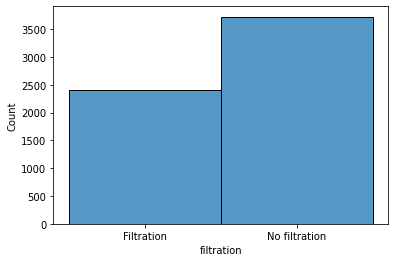

In [69]:
sns.histplot(df['filtration'])

In [70]:
df['filtration'].value_counts()

filtration
No filtration    3725
Filtration       2405
Name: count, dtype: int64

<AxesSubplot: xlabel='colouring', ylabel='Count'>

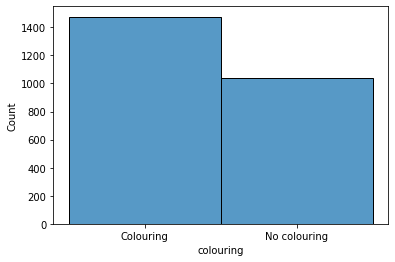

In [71]:
sns.histplot(df['colouring'])

In [72]:
df['colouring'].value_counts()

colouring
Colouring       1476
No colouring    1039
Name: count, dtype: int64

#### Whisky Type

In [73]:
df['whisky_type'].value_counts()

whisky_type
Single Malt     4836
Blended          574
Other            536
Bourbon          230
Unknown          156
Single Grain     133
Rye               94
Name: count, dtype: int64

### Continuous Features

#### Check for skewness

In [74]:
check_for_skewness(df[cont_features])

,skewness,level,direction
nbr_of_ratings,8.531536,3. Highly skewed,Right
bottle_size,1.307348,3. Highly skewed,Right
age,1.294164,3. Highly skewed,Right
abv,0.836346,2. Moderately skewed,Right
rating,-0.705816,2. Moderately skewed,Left


In [75]:
check_for_skewness(df[n_columns_g+t_columns_g+f_columns_g])

,skewness,level,direction
f_Kiwi_g,42.230574,3. Highly skewed,Right
f_Blackberry_g,35.431664,3. Highly skewed,Right
t_Red Currant_g,34.660362,3. Highly skewed,Right
f_Melon_g,32.507446,3. Highly skewed,Right
f_Peach_g,30.919607,3. Highly skewed,Right
f_Pineapple_g,27.162356,3. Highly skewed,Right
f_Grass_g,26.616084,3. Highly skewed,Right
f_Hay_g,25.736864,3. Highly skewed,Right
f_Iodine_g,25.669307,3. Highly skewed,Right
n_Red Currant_g,24.191013,3. Highly skewed,Right


In [76]:
flavor_skewness = check_for_skewness(df[n_columns_g+t_columns_g+f_columns_g])

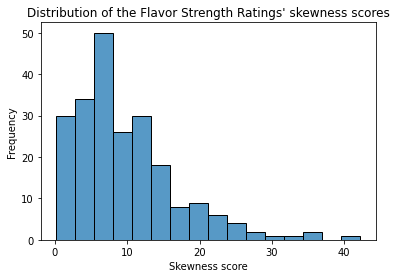

In [77]:
sns.histplot(flavor_skewness['skewness'])

plt.title("Distribution of the Flavor Strength Ratings' skewness scores")
plt.xlabel("Skewness score")
plt.ylabel("Frequency")


plt.savefig('Flavor_Skewness_Plot',dpi=300)

#### Feature engineering

##### Whisky Strength (ABV)

<AxesSubplot: xlabel='abv', ylabel='Count'>

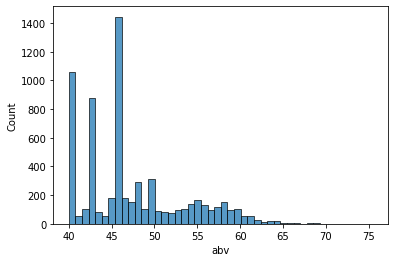

In [78]:
sns.histplot(df['abv'])

In [79]:
# Categorize the ABV-values
conditions = [
    (df['abv'] >= 40) & (df['abv'] < 46),
    (df['abv'] >= 46) & (df['abv'] <= 50),
    (df['abv'] >= 50),
]

#--Specify the VALUES that need to be returned:
values = ['Standard', 'High', 'Very high']

#--Make the NEW COLUMN:
df['abv_CAT'] = np.select(conditions, values)

<AxesSubplot: xlabel='abv_CAT', ylabel='Count'>

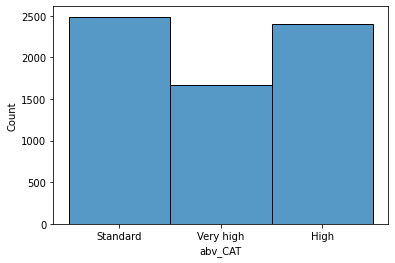

In [80]:
sns.histplot(df['abv_CAT'])

In [81]:
df.groupby('abv_CAT')['rating'].agg('mean').sort_values(ascending=False)

abv_CAT
Very high    4.344602
High         4.039218
Standard     3.776465
Name: rating, dtype: float64

In [82]:
cat_features.append('abv_CAT')
cat_features

['country',
 'region',
 'distillery',
 'bottler',
 'filtration',
 'colouring',
 'maturing',
 'whisky_type',
 'abv_CAT']

##### Popularity (nbr of ratings)

In [83]:
df['nbr_of_ratings'].describe()

count    6559.000000
mean       25.257509
std        85.118316
min         0.000000
25%         1.000000
50%         4.000000
75%        16.000000
max      1486.000000
Name: nbr_of_ratings, dtype: float64

<AxesSubplot: xlabel='nbr_of_ratings', ylabel='Count'>

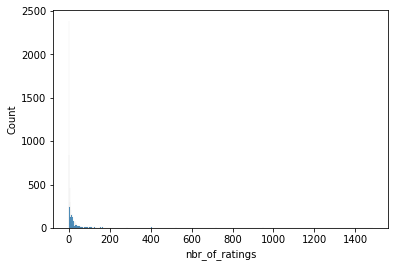

In [84]:
sns.histplot(df['nbr_of_ratings'])

<AxesSubplot: >

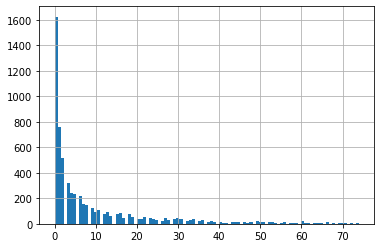

In [85]:
df['nbr_of_ratings'][df['nbr_of_ratings']<75].hist(bins=100)

In [86]:
conditions = [
    (df['nbr_of_ratings'] < 2),
    (df['nbr_of_ratings'] < 5),
    (df['nbr_of_ratings'] < 15),
    (df['nbr_of_ratings'] >= 15),
]

#--Specify the VALUES that need to be returned:
values = ['Single', 'Small', 'Medium', 'Large']

#--Make the NEW COLUMN:
df['nbr_of_ratings_CAT'] = np.select(conditions, values)

In [87]:
df['nbr_of_ratings_CAT'].value_counts()

nbr_of_ratings_CAT
Single    2388
Large     1778
Medium    1316
Small     1077
Name: count, dtype: int64

<AxesSubplot: xlabel='nbr_of_ratings_CAT', ylabel='Count'>

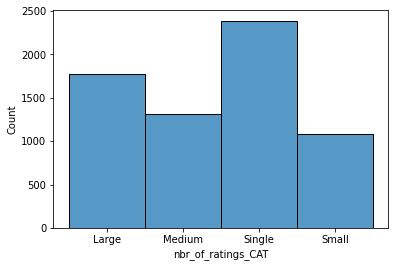

In [88]:
sns.histplot(df['nbr_of_ratings_CAT'])

In [89]:
df.groupby('nbr_of_ratings_CAT')['rating'].agg(['mean','std'])

,mean,std
nbr_of_ratings_CAT,,
Large,3.925534,0.562493
Medium,3.978267,0.657104
Single,4.141547,0.834550
Small,4.070381,0.716135


In [90]:
cat_features.append('nbr_of_ratings_CAT')
cat_features

['country',
 'region',
 'distillery',
 'bottler',
 'filtration',
 'colouring',
 'maturing',
 'whisky_type',
 'abv_CAT',
 'nbr_of_ratings_CAT']

##### Flavor Complexity (Flavor Strength Ratings)

In [91]:
df['finish_complexity'] = df[f_columns_g].apply(lambda x: sum(x>0), axis=1)
df['nosing_complexity'] = df[n_columns_g].apply(lambda x: sum(x>0), axis=1)
df['tasting_complexity'] = df[t_columns_g].apply(lambda x: sum(x>0), axis=1)

complexity_features = ['finish_complexity','nosing_complexity','tasting_complexity']

<AxesSubplot: >

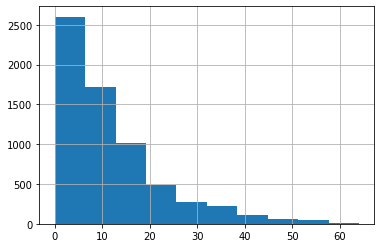

In [92]:
df['nosing_complexity'].hist()

<AxesSubplot: xlabel='nosing_complexity', ylabel='rating'>

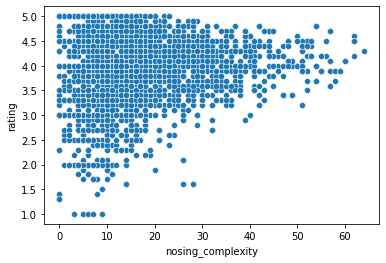

In [93]:
sns.scatterplot(data=df, x='nosing_complexity', y='rating')

<AxesSubplot: >

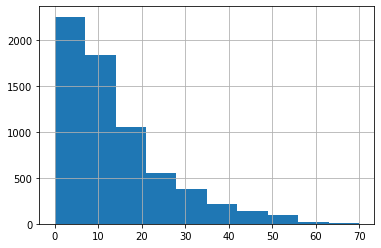

In [94]:
df['tasting_complexity'].hist()

<AxesSubplot: xlabel='tasting_complexity', ylabel='rating'>

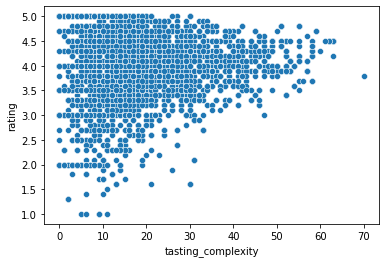

In [95]:
sns.scatterplot(data=df, x='tasting_complexity', y='rating')

<AxesSubplot: >

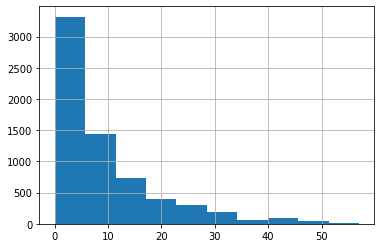

In [96]:
df['finish_complexity'].hist()

<AxesSubplot: xlabel='finish_complexity', ylabel='rating'>

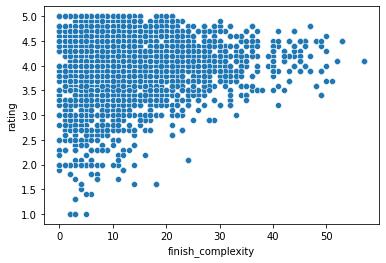

In [97]:
sns.scatterplot(data=df, x='finish_complexity', y='rating')

In [98]:
cont_features.extend(complexity_features)
cont_features

['age',
 'rating',
 'abv',
 'nbr_of_ratings',
 'bottle_size',
 'finish_complexity',
 'nosing_complexity',
 'tasting_complexity']

# SAFE DF + LISTS

### Safe df

In [106]:
df.to_csv('df_cleaned_p2.csv')

### Safe lists

In [107]:
cat_features

['country',
 'region',
 'distillery',
 'bottler',
 'filtration',
 'colouring',
 'maturing',
 'whisky_type',
 'abv_CAT',
 'nbr_of_ratings_CAT']

In [108]:
cat_features.extend(['country_CAT', 'region_CAT', 'bottler_CAT', 'distillery_CAT','maturing_CAT'])
cat_features

['country',
 'region',
 'distillery',
 'bottler',
 'filtration',
 'colouring',
 'maturing',
 'whisky_type',
 'abv_CAT',
 'nbr_of_ratings_CAT',
 'country_CAT',
 'region_CAT',
 'bottler_CAT',
 'distillery_CAT',
 'maturing_CAT']

In [109]:
cont_features

['age',
 'rating',
 'abv',
 'nbr_of_ratings',
 'bottle_size',
 'finish_complexity',
 'nosing_complexity',
 'tasting_complexity']

In [110]:
complexity_features

['finish_complexity', 'nosing_complexity', 'tasting_complexity']

In [111]:
missing_features_CAT = [
    'missing_colouring', 'missing_filtration', 'missing_country', 'missing_region',
    'missing_distillery', 'missing_bottler', 'missing_maturing'
]

missing_features_CONT = [
    'missing_age','missing_rating'
]

missing_features_ALL = missing_features_CAT + missing_features_CONT

In [112]:
all_feature_lists_v2 = [
    id_features,
    cont_features,
    cat_features,
    global_flavor_features,
    f_columns_g,
    n_columns_g,
    t_columns_g,
    complexity_features,
    missing_features_CAT,
    missing_features_CONT,
    missing_features_ALL
]

In [113]:
with open ('all_feature_lists_v2', 'wb') as fp:
    pickle.dump(all_feature_lists_v2,fp)